In [134]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [111]:
!pip install folium
import folium
from folium.plugins import HeatMap

In [112]:
df = pd.read_pickle('dataset.pkl')

In [113]:
df.describe()

,geonames_id,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,expenses_zscore
count,74770.000,51889.000,51889.000,89721.000,89721.000,83887.000,89721.000,6216.000,56308.000,12069.000,12058.000
mean,3561684.280,-34.730,-59.076,208761.667,166.431,116.192,1773.945,4.277,3.013,2802.150,-0.045
std,367957.304,1.841,2.053,202348.918,242.566,110.208,932.112,4.227,1.308,5912.947,0.502
min,3427208.000,-54.820,-71.665,1323.332,25.000,25.000,8.062,1.000,1.000,1.000,-2.261
25%,3430234.000,-34.666,-58.690,92000.000,52.000,47.000,1156.069,2.000,2.000,1000.000,-0.166
50%,3433775.000,-34.599,-58.473,145000.000,85.000,76.000,1666.667,3.000,3.000,1900.000,-0.027
75%,3436397.000,-34.473,-58.395,250000.000,190.000,150.000,2300.000,6.000,4.000,3800.000,-0.010
max,6948895.000,-23.137,-54.556,7664487.633,6168.000,2700.000,16666.667,54.000,10.000,380000.000,2.964


### Heatmap Price_USD_per_m2 - CABA & GBA

In [120]:
dfCaba = df[(df.lat.notna()) & (df.lon.notna()) & (df.zona=='Capital & GBA') & (df.lat > -38) & (~df.price_aprox_usd.isna())].copy()

In [121]:
max_amount = float(dfCaba['price_aprox_usd'].max())

hmap = folium.Map(location=[-34.591789,-58.396295], zoom_start=10, )

hm_wide = HeatMap( list(zip(dfCaba.lat.values, dfCaba.lon.values, dfCaba.price_aprox_usd.values)),
                   min_opacity=0.4,
                   max_val=max_amount,
                   radius=8, blur=8, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)

# Guardar como html
# hmap.save(outfile="test.html") 

### Heatmap Price_USD_per_m2 - INTERIOR

In [122]:
dfint = df[(df.lat.notna()) & (df.lon.notna()) & (df.zona=='Interior') & (df.lat > -38) & (~df.price_aprox_usd.isna())].copy()

In [123]:
max_amount = float(dfint['price_aprox_usd'].max())

hmap = folium.Map(location=[-34.591789,-58.396295], zoom_start=5, )

hm_wide = HeatMap( list(zip(dfint.lat.values, dfint.lon.values, dfint.price_aprox_usd.values)),
                   min_opacity=0.4,
                   max_val=max_amount,
                   radius=12, blur=12, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)

### Histogramas

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


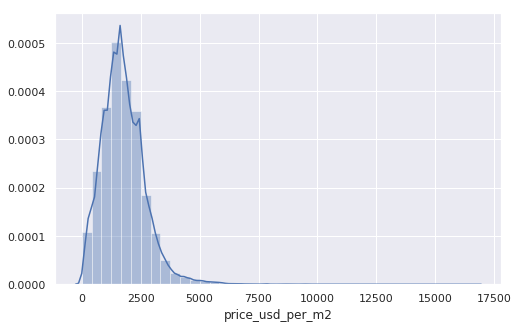

In [124]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df['price_usd_per_m2'],bins=40)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


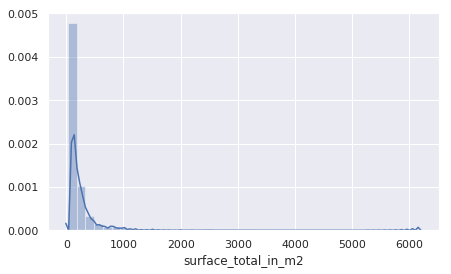

In [125]:
sns.set(rc={'figure.figsize':(7,4)})
sns.distplot(df['surface_total_in_m2'],bins=40)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


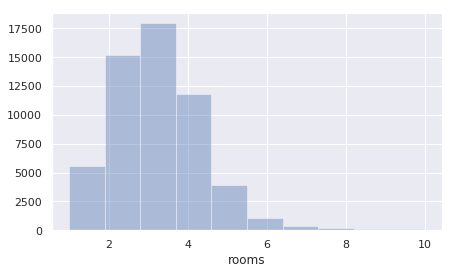

In [126]:
sns.set(rc={'figure.figsize':(7,4)})
sns.distplot(df['rooms'],kde=False,bins=10)

### Boxplots

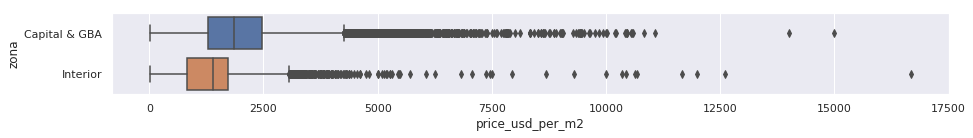

In [127]:
# Precios USD por m2 - zonas
sns.set(rc={'figure.figsize':(15,1.5)})
sns.boxplot(df['price_usd_per_m2'].sort_values(ascending=False),df['zona'])

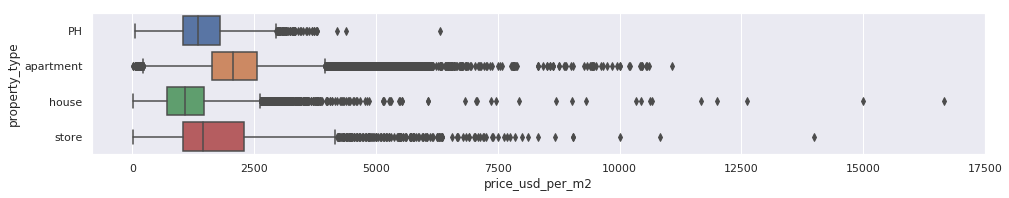

In [128]:
# Precios USD por m2 - Tipo de Propiedad
sns.set(rc={'figure.figsize':(16,2.6)})
sns.boxplot(df['price_usd_per_m2'].sort_values(ascending=False),df['property_type'])

### Lineplots

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


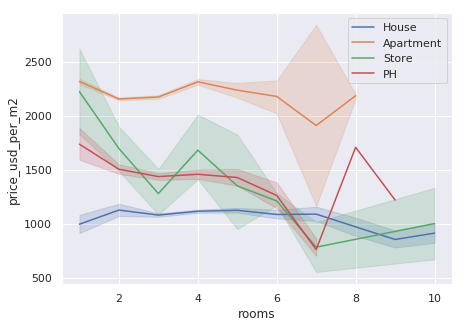

In [129]:
sns.set(rc={'figure.figsize':(7,5)})

sns.lineplot(df['rooms'],df['price_usd_per_m2'][df['property_type']=='house'],label='House')
sns.lineplot(df['rooms'],df['price_usd_per_m2'][df['property_type']=='apartment'],label='Apartment')
sns.lineplot(df['rooms'],df['price_usd_per_m2'][df['property_type']=='store'],label='Store')
sns.lineplot(df['rooms'],df['price_usd_per_m2'][df['property_type']=='PH'],label='PH')

In [130]:
df['zona'].unique()

array(['Capital & GBA', 'Interior'], dtype=object)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


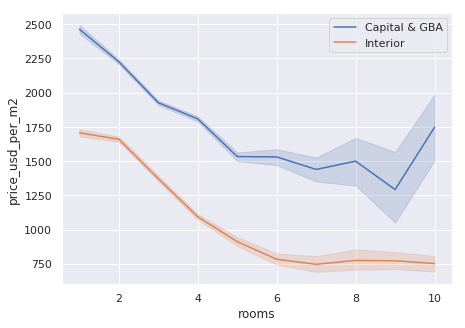

In [131]:
sns.set(rc={'figure.figsize':(7,5)})

sns.lineplot(df['rooms'],df['price_usd_per_m2'][df['zona']=='Capital & GBA'],label='Capital & GBA')
sns.lineplot(df['rooms'],df['price_usd_per_m2'][df['zona']=='Interior'],label='Interior')

### Analisis covarianzas

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for 

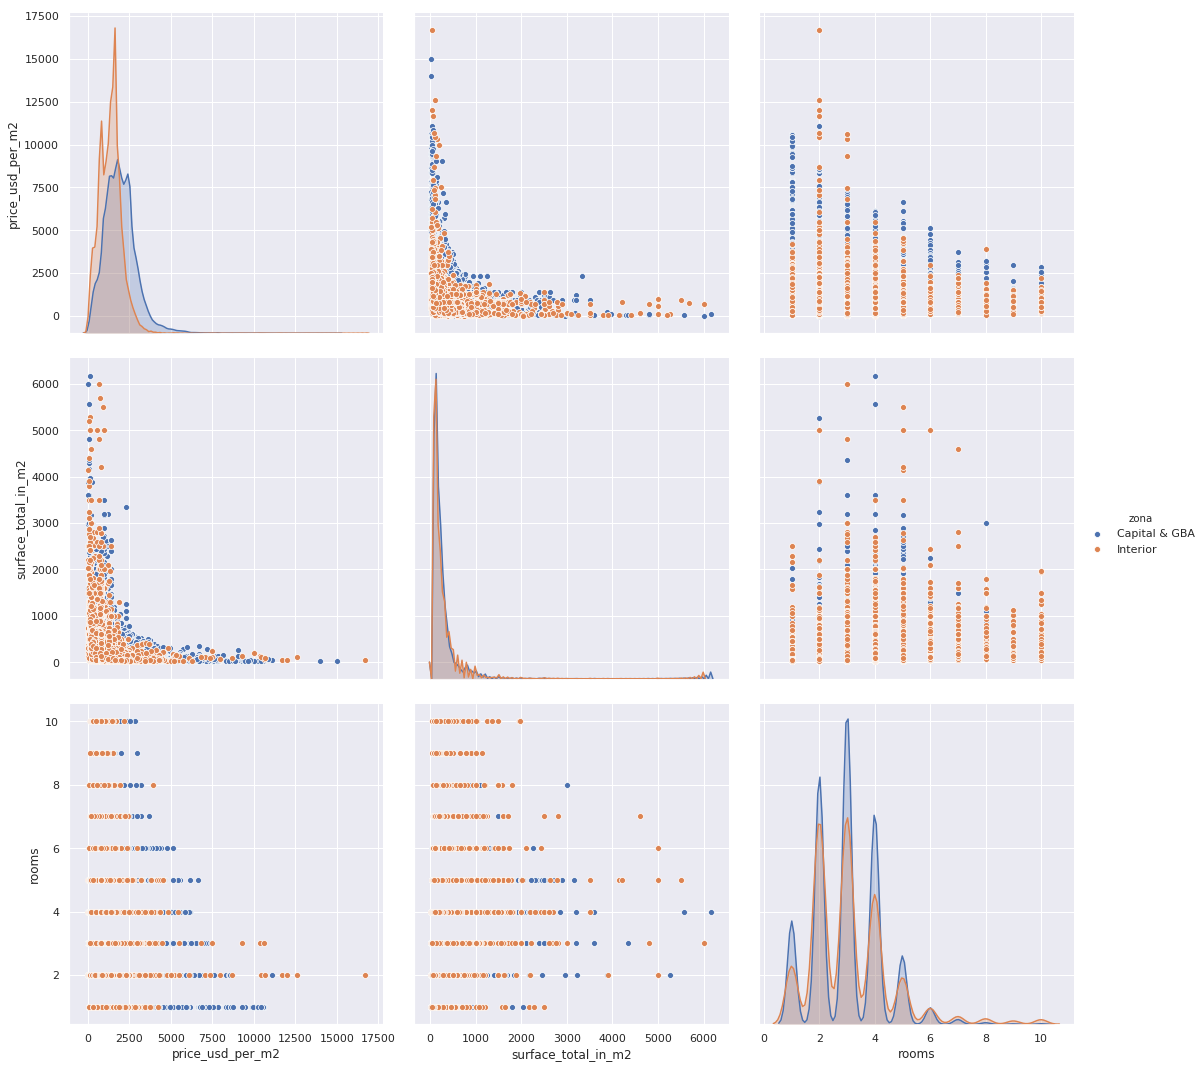

In [132]:
# Análisis por zona
a = df.loc[:,('zona','price_usd_per_m2',"surface_total_in_m2",'rooms')]
sns.pairplot(a, vars=[c for c in a.columns if c != 'zona'], hue='zona', size=5);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for 

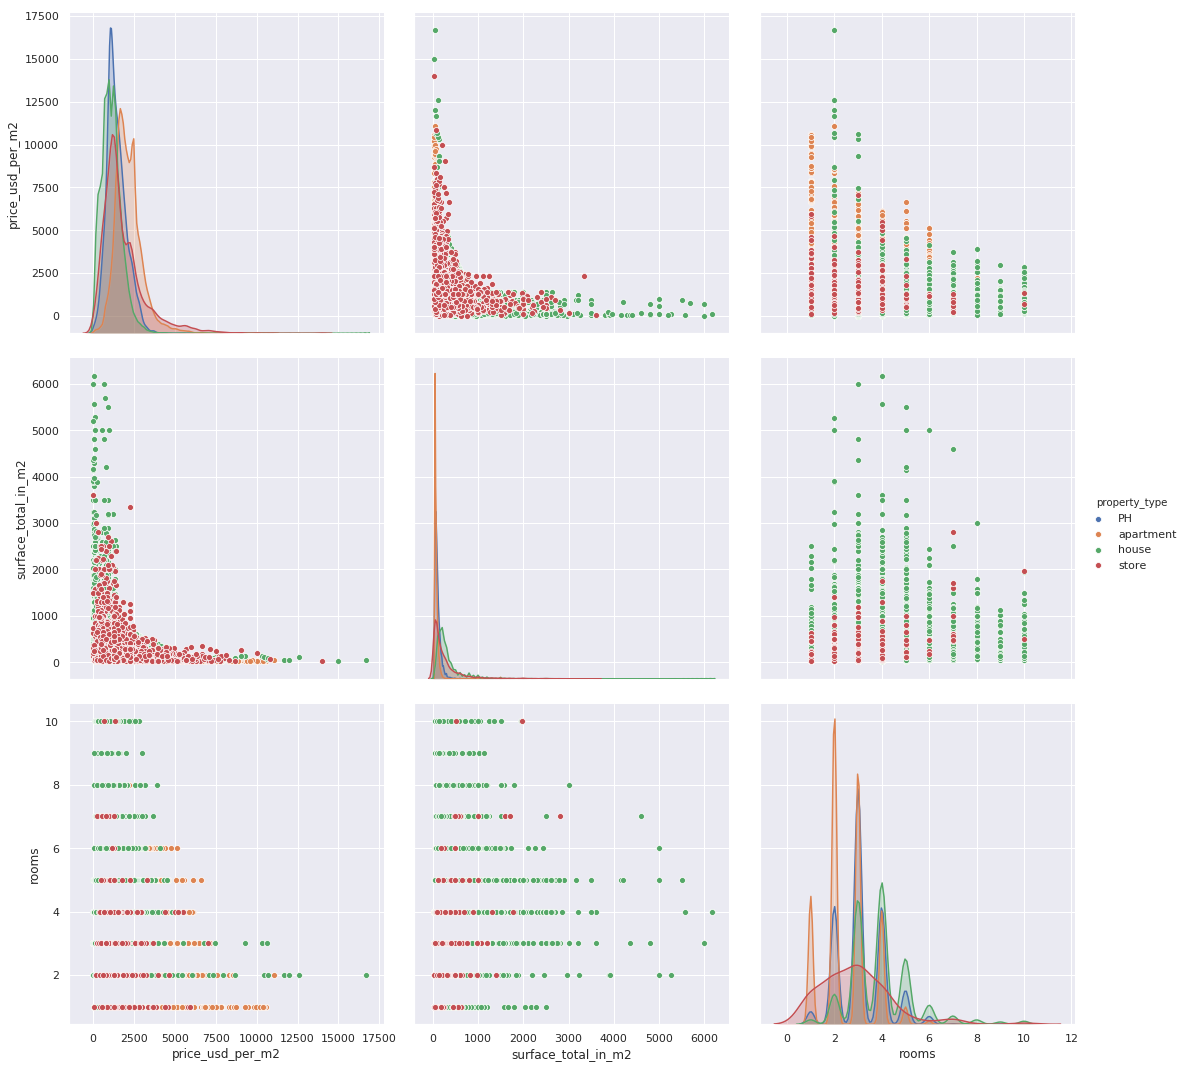

In [133]:
# Análisis por tipo de propiedad
a = df.loc[:,('property_type','price_usd_per_m2',"surface_total_in_m2",'rooms')]
sns.pairplot(a, vars=[c for c in a.columns if c != 'property_type'], hue='property_type', size=5);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


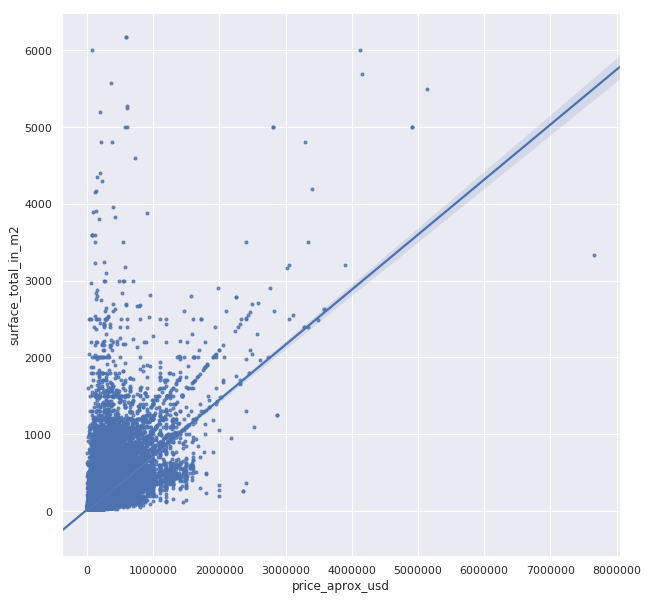

In [116]:
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(x=df['price_aprox_usd'], y=df['surface_total_in_m2'],marker='.')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


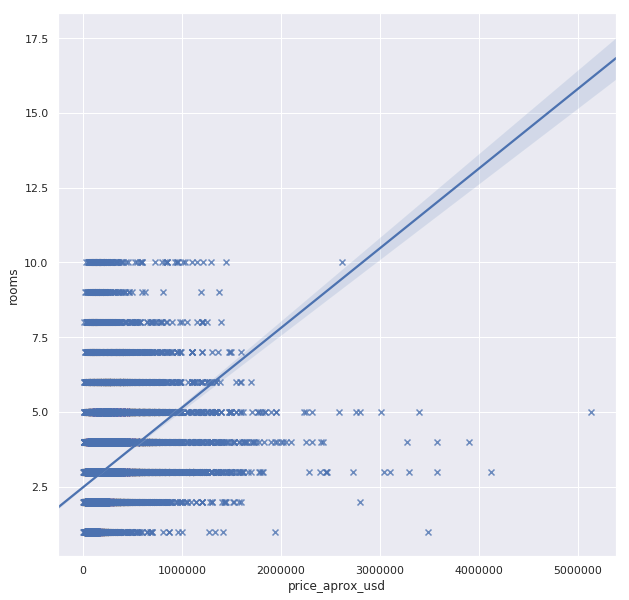

In [117]:
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(x=df['price_aprox_usd'], y=df['rooms'],marker='x')